# Multiclass classification 1: Split and scale

This notebook assumes you have some familiarity with:

- Basic Python syntax and functions.
- Numerics and visualization with NumPy and `matplotlib` or `seaborn`.
- Exploratory data analysis with Pandas.
- The essential concepts of supervised machine learning.
- The fundamentals of machine learning algorithms.

If you're a bit short on a couple of these elements, not to worry. There are other courses that cover them, but you might find that we breeze past some topics in this class. Ask questions and follow links!

## The machine learning iterative loop

![Iterative loop](../images/ML_loop.png)

## The lithology prediction task

<img src="../images/machine_learning_primer.png"></img>

## Load the data

In [3]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/Panoma_training_data.csv')
df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology,RHOB,Mineralogy,Siliciclastic
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone,2393.499945,siliciclastic,True
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone,2416.119814,siliciclastic,True
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone,2404.576056,siliciclastic,True
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone,2393.249071,siliciclastic,True
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone,2382.602601,siliciclastic,True


## Make `X` and `y`

### EXERCISE

**Make the `X` and `y` arrays we'll use for training.** `X` is going to be the columns `'GR','RHOB','PE','ILD_log10'` and `y` will be the `'Lithology'` column. Cast the data to NumPy arrays. <a title="Use ordinary dict-style indexing to get the columns out of the DataFrame. Use the values attribute of the columns to get the equivalent NumPy array."><b>Hover for HINT</b></a>

In [4]:
# YOUR CODE HERE
features = [...]
X = 
y = 

SyntaxError: invalid syntax (18259793.py, line 3)

In [5]:
features = ['GR','RHOB','PE','ILD_log10']

# You *can* leave these as Pandas objects, but I prefer NumPy arrays, especially for plotting.
X = df[features].values
y = df['Lithology'].values

In [6]:
N, M = X.shape
assert N >= 3000, "There should be more records"
assert M == 4, "There should be 4 features"
assert y.size == N, "The length of y should match X"

## What not to do

We've all seen the YouTube videos on `sklearn`, this should be easy!

In [7]:
from sklearn.neighbors import KNeighborsClassifier



In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X, y)

print(clf.score(X, y))

0.68910741301059


❓ **What do you think of this? Do you trust this model?**

<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> 

Problems:

- Using all of the data, so only have training score. But the model has seen this data. It gives us no idea how this will perform on future data. **We need to figure out how the model generalizes.**
- We're not sure what this score represents.
- Dion't know how it performs on the various classes.
- Picked model out of the blue, without comparing to others.
- This is quite a naive model so should not be the only one we try.
- This model depends on distance and we did not scale our data.
- No attempt to tune the model, e.g. which value of k is best?
- No idea what baseline (e.g. dummy) performance is.

## Split the data

We must split the data so that the model doesn't get to see everything.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

Now we can train a model!

**❓ Would we expect the score to go up or down?**

In [10]:
clf = KNeighborsClassifier(n_neighbors=5)  # <- Hyperparameter.

clf.fit(X_train, y_train)

print(clf.score(X_val, y_val))

0.5652173913043478


Now we can mess about with the hyperparameters.

❓ **What do you think? Is one hold-out set enough?**

<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> 

In general, you need three datasets for training and evaulating models:

- **Train** &mdash; For fitting a candidate model.
- **Val** &mdash; For comparing different hyperparameter choices (model selection).
- **Test** &mdash; For seeing how well the final model generalizes.

Be careful; people give these different names sometimes. And people do different things with respect to comparing different algorithms &mdash; should we re-use the **Val** dataset, or use **Test**? If we use **Test**, are we possibly overfitting to that... 

Anyway, we at least need to split the validation set into two parts: one to validate against while selecting hyperparameters (sometimes also called the **dev** set), and one to assess the likely real-world performance of the trained model.

Note that you should only predict on the **test** set once, at the end of model selection and tuning.

In [11]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [12]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

print(clf.score(X_val, y_val))

0.5649432534678437


❓ **What do you think? Is this a fair test?**

<br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> <br /> 

No, it's not. It's leaky.

---

## The IID assumption

**IID** stands for **independent and identically distributed**, and most machine learning algorithms implicitly assume your data are IID. To put it another way: our samples are random.

**❓ Are our records independent and identically distributed?**

### Independent

This would mean that the observations are independent of each other — they are unrelated. In other words, you can't predict one observation from another.

Are our data records independent?

When we split the data, how should this be done?

[There's a pitfall here that no-one is immune to!](https://twitter.com/andrewyng/status/931026446717296640)

In [13]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'NEWBY', 'CHURCHMAN BIBLE', 'STUART', 'CRAWFORD'], dtype=object)

### EXERCISE

- Make a list of training wells that includes all the wells **except** `CROSS H CATTLE` and `SHANKLE`.
- Use Pandas [`DataFrame.isin()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) to select only those wells for training data (`X_train` and `y_train`).
- Also make **val** and **test** sets out of `CROSS H CATTLE` and `SHANKLE` respectively.
- Train a model and score on the **val** well. Do you expect a better or worse score than before?

In [ ]:
# YOUR CODE HERE



In [21]:
train_wells = ['CHURCHMAN BIBLE', 'CRAWFORD' , 'LUKE G U', 'NEWBY', 'NOLAN', 'SHRIMPLIN', 'STUART']

train_flag = df['Well Name'].isin(train_wells)

X_train = df.loc[train_flag, features].values
y_train = df.loc[train_flag, 'Lithology'].values

X_test = df.loc[df['Well Name']=='CROSS H CATTLE', features].values
y_test = df.loc[df['Well Name']=='CROSS H CATTLE', 'Lithology'].values

X_val = df.loc[df['Well Name']=='SHANKLE', features].values
y_val = df.loc[df['Well Name']=='SHANKLE', 'Lithology'].values

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.40725806451612906


### Identically distributed

In identically distributed datasets, the records all come from the same underlying distribution. If the first 10 records come from a particular normal distribution, the next 10 records must come from the same distribution.

Is this the case in our data?

When we split the data, how should this be done?

Think of the classes in the data: sandstone, limestone, etc. There are not equal numbers of each lithology. When splitting the dataset, we need to ensure that we maintain the distribution **with respect to the labels**. 

Now think of the features: GR, RHOB, etc. These vary widely across the dataset. Clearly it would be bad to end up with all the high-GR samples in `train` with none in `val`: we would never validate those samples. So we also need to maintain the distribution of the data **with respect to the features**. 

The distributions don't really need to be totally identical, that would be impossible. But they should be very alike.

---

## Split the data

There are two general approaches to validation:

![Validation strategies](../images/validation_strategies.png)

We'll only keep three fully separate datasets if we can afford the data. Often we don't have as much data as we'd like and it's advantageous to combine **train** and **val** into a single dataset. Many people refer to this as 'cross validation' (though note that this can refer to the hold-out strategy as well).

There are a few ways we could do this:

- Randomly split the _records_ into **train**, **val** and **test** sets.
- Split up _formations_ (or beds, or ages) into **train**, **val** and **test** sets.
- Split up the _wells_ into **train**, **val** and **test** sets.
- Split up _groups of wells_ into **train**, **val** and **test** sets.

**❓ Which approach should we use?**

### EXERCISE

What is the distribution of lithologies across the entire dataset? You can make a small table, or a plot. <a title="Check out the value_counts() method on the dataframe"><b>Hover for HINT</b></a>

What is the distribution of lithologies across the wells? <a title="Check out pd.crosstab"><b>Hover for HINT</b></a>

In [7]:
# YOUR CODE HERE


<AxesSubplot:>

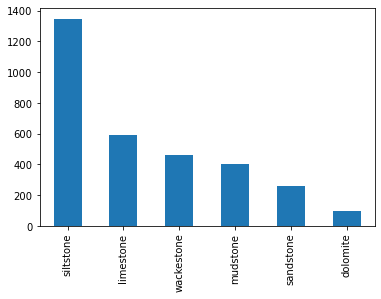

In [8]:
# Build this up.
df['Lithology'].value_counts().plot(kind='bar')

In [14]:
ct = pd.crosstab(df['Lithology'], df['Well Name'])

ct

Well Name,CHURCHMAN BIBLE,CRAWFORD,CROSS H CATTLE,LUKE G U,NEWBY,NOLAN,SHANKLE,SHRIMPLIN,STUART
Lithology,,,,,,,,,
dolomite,34,63,2,20,16,4,17,5,29
limestone,125,75,68,74,87,116,40,81,71
mudstone,43,55,53,37,86,75,26,81,87
sandstone,8,15,158,0,0,4,89,0,8
siltstone,106,77,184,246,178,186,205,241,163
wackestone,87,62,31,84,96,30,71,63,104


We can also make a plot...

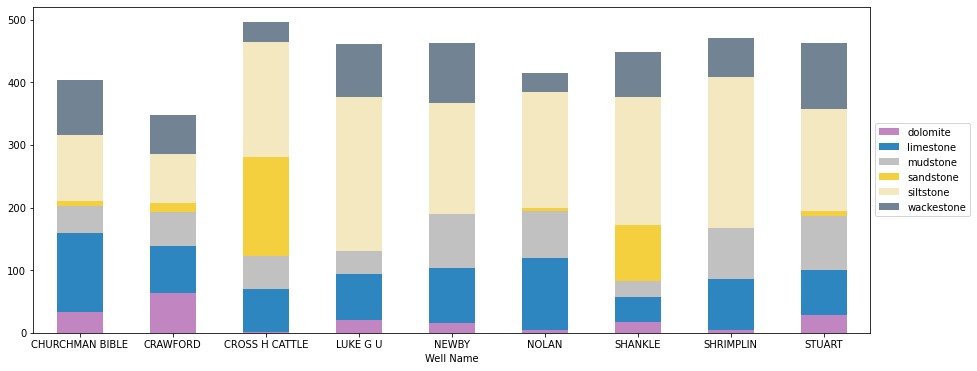

In [17]:
# Or we can make a matplotlib plot to represent the rocks:
from matplotlib.colors import ListedColormap

classes = {
    'dolomite': '#C186C1',
    'limestone': '#2E86C1',
    'mudstone': '#C1C1C1',
    'sandstone': '#F4D03F',
    'siltstone': '#F3E8BF' ,
    'wackestone': '#728393',
}

cmap_facies = ListedColormap(classes.values(), 'indexed')
ax = ct.T.plot(kind='bar', stacked=True, rot=0, figsize=(15, 6), cmap=cmap_facies)
_ = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Let's split!

We're going to use a cross-validation strategy for the training wells, and only split out a test set.

But if you have enough training data, it's probably better to stick to holdout sets.

In [15]:
train_wells = ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY',
               'NOLAN', 'SHANKLE', 'SHRIMPLIN', 'STUART']  # ⚠️ Removed CRAWFORD

train_flag = df['Well Name'].isin(train_wells)

X_train = df.loc[train_flag, features].values
y_train = df.loc[train_flag, 'Lithology'].values

# And we might need this later...
wells = df.loc[train_flag, 'Well Name'].values

In [16]:
X_train.shape, y_train.shape

((2709, 4), (2709,))

In [17]:
X_test = df.loc[~train_flag, features].values
y_test = df.loc[~train_flag, 'Lithology'].values

In [18]:
X_test.shape, y_test.shape

((1257, 4), (1257,))

### Sanity check the distributions

Let's visualize the distributions over the features, for each of the datasets. We'd like the distributions to match, i.e. training matches val and test.

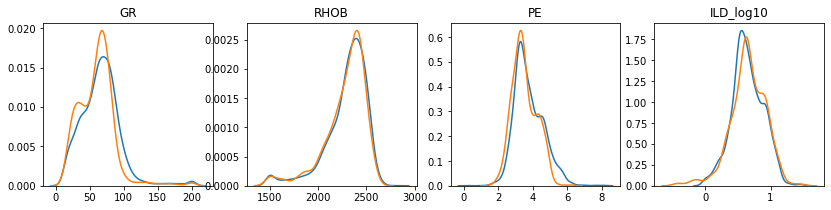

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, figsize=(14,3))

for ax, feature, *datasets in zip(axs, features, X_train.T, X_test.T):
    for dataset in datasets:
        sns.kdeplot(dataset, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(feature)

In the data space, two of the parameters look like this:

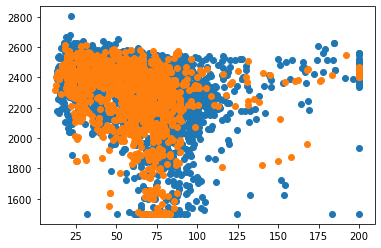

In [20]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1])

---

## Scale the data

Some methods don't care about the scale of the features. For example, decision trees and random forests treat each feature independently.

However, most methods &mdash; for example those relying on distance (e.g. KNN, SVMs), or on linear combinations (e.g. linear regression), or on squeezing functions (e.g. neural nets) &mdash; require the data to be normalized or standardized:

- **Normalization**: scaling to a range of [0, 1] or [-1, +1] for example. As a rule of thumb, you might do this for uniformly distributed data.
- **Standardization**: scaling to a zero mean and unit variance (also known as Z-score). Do this for normally (Gaussian) distributed data.

It's likely a good idea to scale it no matter which method you try.

`scikit-learn` has lots of scalers. The `StandardScaler` removes the mean and scales the data to unit variance.

Let's take a quick look at the data before scaling:

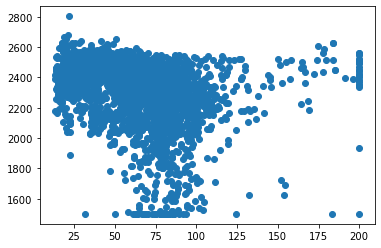

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

Notice that interpreting this as a Euclidean space — which is how a lot of machine learning models are going to look at it — seems to distort the data, purely because of the (potentially arbitrary, as here) difference in scales across the features. 

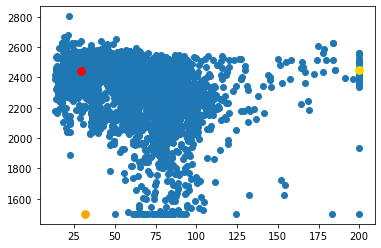

In [95]:
x0, x1, x2 = X[3200, :2], X[898, :2], X[3114, :2]

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(*x0.T, c='red', s=60)
plt.scatter(*x1.T, c='gold', s=60)
plt.scatter(*x2.T, c='orange', s=60)
# plt.axis('equal')  # <-- Now uncomment this line to see how Euclid sees it!
plt.show()

We fit a scaler to the training data, then transform all the datasets, with a pattern that will become very familiar:

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

Note that we're not actually going to scale the data at this point. We'll scale it as part of the machine learning pipeline, so that we can split the data in arbitrary ways.

Now let's plot the data using equal axes:

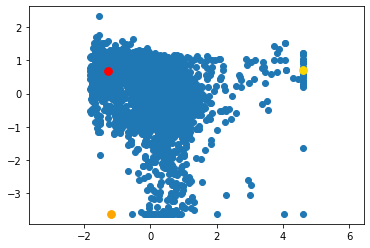

In [97]:
s0 = scaler.transform(X)[3200, :2]
s1 = scaler.transform(X)[898, :2]
s2 = scaler.transform(X)[3114, :2]

plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.scatter(*s0.T, c='red', s=60)
plt.scatter(*s1.T, c='gold', s=60)
plt.scatter(*s2.T, c='orange', s=60)
plt.axis('equal')
plt.show()

This is better.

**NOTE**

Data normalization doesn't magically fix problems with the data. If you're lumping a bunch of well data together and the GR, say, is calibrated differently in each well, or the RHOB units vary, then the scaled data will also have this problem. So you still need to QC your data to ensure it's internally consistent.

### ❓ Should you scale the target?

There is usually no advantage to scaling the target, and it does make model evaluation a bit more fiddly, so we generally don't do it.

The exception is for some neural network approaches. Very large magnitudes may result in 'exploding gradients', which in turn may result in 'saturation' (for some activation functions), or in very large updates to the parameters. Either way, the network will struggle to learn. So in these cases, we will sometimes scale a regression target for a neural network.

---

## Freezing the data

In [108]:
np.savez("All_data.npz",
         X_train=X_train, X_test=X_test,
         y_train=y_train, y_test=y_test,
         wells=wells,
         )

We'll pick up the data in the next notebook.

---

# QUIZ!

<hr />

<p style="color:gray">©2021&ndash;2022 Agile Geoscience. Licensed CC-BY.</p>